# Plotting with `ggplot` and `plotnine`

### Useful resources
* https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/index.html
* https://plotnine.readthedocs.io/en/stable/api.html

## Session prep

In [3]:
#Import packages
import pandas as pd

try:
    from plotnine import *
except:
    !pip install plotnine
    from plotnine import *

In [4]:
#Instruct Jupyter to display plots inline
%matplotlib inline

## 1. Loading the data into Python

In [5]:
#Join the two dataframes into one using the Pandas "merge" command
dfWaterUse = pd.read_csv('./data/State_Data_Formatted_All.csv')

## 2. Plotting our data
The next step is to construct our plots, which we will be doing with the `Plotnine` package. This package enables us to use the`ggplot` interface, which has a bit of a steep learning curve. So, let's pause and introduce the grammer of graphics...

---
### ►`ggplot` _and the Grammer of Graphics_ ◄
Plots have numerous options in presentation, design, and content. The Grammer of Graphics ("GG") is a set of structural rules defining the components of a plotting language that strives to simplify designing plots from such a wide array of options from a coding platform. Even so, it has a bit of a steep learning curve, so to help with that, let's examine it from it's foundations. 

The ["CheatSheet"](https://www.rstudio.com/wp-content/uploads/2016/11/ggplot2-cheatsheet-2.1.pdf) for `ggplot2` (the "R" version of what we are doing) provides a quick introduction to GG. In it, we see that plots are divided into a set of components that our code must specify:
* First is the source of the **data** for our plot. 
* Associated with the data object are its **aesthetics**. The aesthetics include the columns that we wish to plot, as well as the size and color attributes we want to assign to these features. 
* Then we specify a **`geom`** object, which indicate how we want to plot our data. We can specify multiple `geom` objects.

There are some more elements in the grammer of graphics, but let's start there and experiment. First, let's see if we can replicate the stacked bar plot we did in Tableau.  

---

#### Stacked bar plot
Take a look at the ggplot2 cheatsheet. Specifically, look at the various plotting functions, or "**geoms**", we have at our disposal. They are organized by the types of data we wish to plot. In our example, we want to plot one discrete value ("`Category`") and one continuous one ("`Withdrawal_MGD`"). The option for `geom_col` appears to serve our purpose. Let's try that: 

This is a two step process. First we create the base ggplot object, telling it to use the `dfAll` dataframe as the source of data. Then, we add our `geom_col` object, using its `aes` object to define which columns to use in the plot. On doing that, our plot appears in our our notebook.

In [6]:
#Create the ggplot object, defining it to use our dfAll dataframe as the source of data
myPlot = ggplot(data=dfWaterUse)

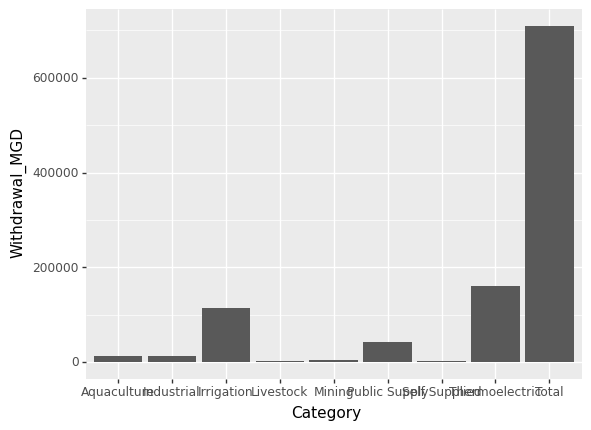

<ggplot: (-9223371961135172085)>

In [7]:
#Now add the geom_col object to our ggplot object along with some aesthetics, and it will plot
myPlot + geom_col(aes(x='Category', y='Withdrawal_MGD'))

A good start, but not perfect. We'll continue with adjustments, but first...

► <u>To try</u>: The above plot shows water use brokend down by _Category_ . Tweak the statement (copied from above) so that it creates a plot similar to the one above, but showing total withdrawal by _Source_.

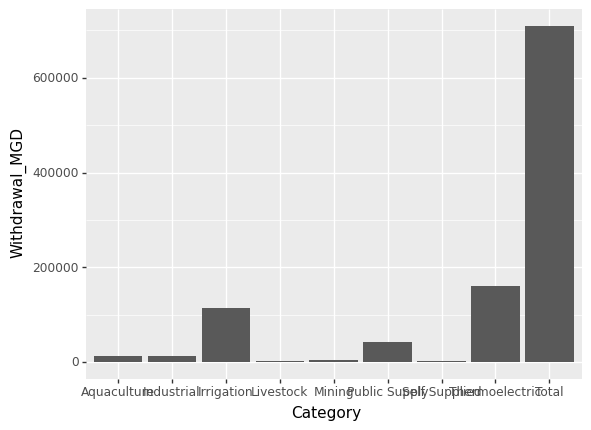

<ggplot: (-9223371961133749623)>

In [9]:
myPlot + geom_col(aes(x='Category', y='Withdrawal_MGD'))

---
#### Aesthetics: *fill*
Next, we can modify our plot by tweaking the **aesthetics**. Here we'll use the `fill` property, which colors the bar based on the property we specify. (_I've also now split the command across mulitple lines to improve readability._)

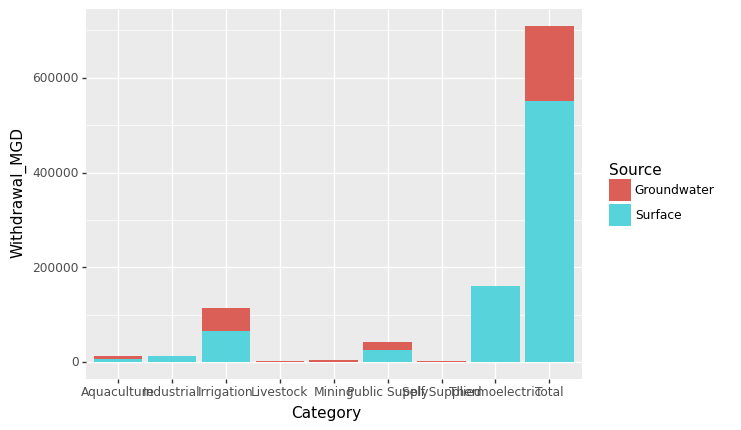

<ggplot: (-9223371961133879096)>

In [12]:
#Now add the geom_col object
myPlot + geom_col(aes(x='Category',
                      y='Withdrawal_MGD',  
                      fill='Source',
                      ))

#### Facets: *facet_grid*
More interesting and closer to our ultimate goal, but we also want separate plots for Fresh vs Saline water withdrawals. This is done using **facets**. Facets split data on values in one or more fields, creating a separate plot for each subset of data. Below the `facet_grid` command causes our plot to create separate plots based on values the `Type` field. (*I've again modified the format of the Python command to make it more readable...*)

The `facets='.~Type'` argument passed to the facet_grid indicated that we want to create a new plot for each unique value in the "Type" column (i.e. "Fresh" or "Saline"), and place those side by side. Try changing the value to `Type~.` and see what happens. Then try `Source~Type`. This reveals that we can specify various fields to represent rows and columns of plot facets from our dataset; the field written before the `~` is used for rows of plots and after the `~` for columns. And we can add a `.` on either side as a placeholder if we only want one field. 

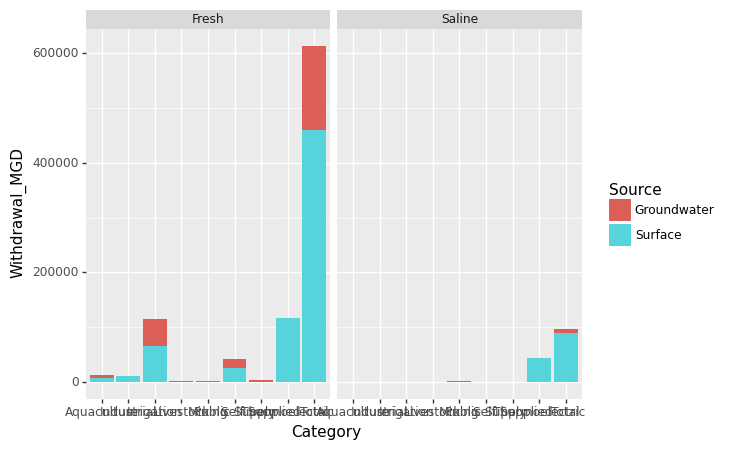

<ggplot: (75721655963)>

In [13]:
#Create facets based on the Type column
(ggplot(data=dfWaterUse) + 
 geom_col(aes(x='Category',
              y='Withdrawal_MGD',
              fill='Source')) + 
 facet_grid(facets='.~Type')     #Adds a seperate "facet" for Fresh and Saline types; plots side by side
)

#### Labels and coordinate systems
Closer to what we want, but we still need to:
* add a title to our plot,
* tidy up the axis labels, and
* arrange the data so the bars are horizontal
The first two can be done using label commands found in the cheat sheet (see the `Labels` section), and the command for swapping axes is found in the `coordinate systems` section. Notice the bottom three additions to the code used to create our plot. Also notice how we modify the argument supplied to the `facet_grid` command: by switching from `.~Type` to `Type~.` (see above).

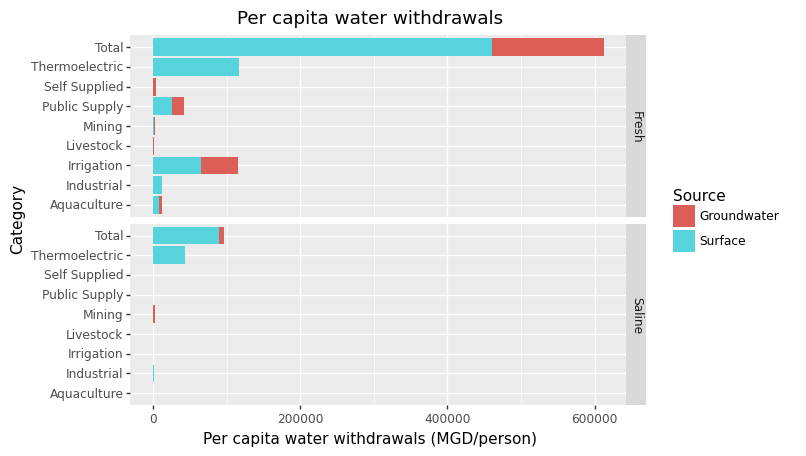

<ggplot: (75721065399)>

In [14]:
#Add/fix labels, swap axes, and place facets horizontally
(ggplot(data=dfWaterUse) + 
 geom_col(aes(x='Category',
              y='Withdrawal_MGD',
              fill='Source')) + 
 facet_grid(facets='Type ~ .') +
 ggtitle('Per capita water withdrawals') + 
 ylab("Per capita water withdrawals (MGD/person)") +
 coord_flip() 
)

#### Filtering and sorting our plot
To complete our plot, we still need to remove the Total category, show results for Fresh water withdrawals only, and sort the values in our plot by category, showing them from least to largest per capita withdrawal. 

* Filtering our data to exclude the Total category and keep only Fresh withdrawals is a matter of querying the original dataframe, which we've done in a previous session.

In [15]:
#First we create a dataframe without the "Total" category and with only the "Fresh" type
dfSubset = dfWaterUse.query('Category != "Total" and Type == "Fresh"')

* Sorting the data, however, is a bit more advanced. It requires first computing the total withdrawals for each category, i.e. the values on which we want to sort; this is done using `groupby` and an `agg` function. Then we sort those values and export the category names as a list. This is then set as a [sorted] categorical variable in our dataframe, which can then be used at the `X` variable in our plot. (Yes, this is quite convoluted, but it works...)

In [16]:
#Create a list of Category values sorted by MGD_PerCapita
dfSorted = (dfSubset.groupby('Category')              #Group data on Category
                    .agg({'Withdrawal_MGD':'sum'}) )  #Compute the sum of the MGD_perCapita for each Category value
#Show the unsorted results
dfSorted

,Withdrawal_MGD
Category,
Aquaculture,12320.64
Industrial,12058.06
Irrigation,115362.39
Livestock,2000.08
Mining,2248.05
Public Supply,42042.76
Self Supplied,3603.53
Thermoelectric,116951.88


In [17]:
dfSorted.sort_values(by='Withdrawal_MGD', #Sort values based on sum MGD_perCapita
                     ascending=False,     #...in descending order
                     inplace=True)        #and update the dataframe
#Show the resulting dataframe
dfSorted

,Withdrawal_MGD
Category,
Thermoelectric,116951.88
Irrigation,115362.39
Public Supply,42042.76
Aquaculture,12320.64
Industrial,12058.06
Self Supplied,3603.53
Mining,2248.05
Livestock,2000.08


In [18]:
#Export the index of the sorted dataframe to a Python list
category_list = dfSorted.index.tolist()               
print(category_list)

['Thermoelectric', 'Irrigation', 'Public Supply', 'Aquaculture', 'Industrial', 'Self Supplied', 'Mining', 'Livestock']


..and this is where it gets quite complicated.

In [19]:
#Convert these values to a Pandas Categorical object and add back to the original dataframe
Category_sort = pd.Categorical(dfSubset['Category'],categories=category_list)

#Assign these values to a new column in the dataframe
dfSubset = dfSubset.assign(Category_sort = Category_sort)

#Display the results
dfSubset.head()

,State,Source,Type,Category,Withdrawal_MGD,Population,Category_sort
212,Alabama,Surface,Fresh,Public Supply,551.0,4780000,Public Supply
213,Alaska,Surface,Fresh,Public Supply,51.8,710000,Public Supply
214,Arizona,Surface,Fresh,Public Supply,628.0,6390000,Public Supply
215,Arkansas,Surface,Fresh,Public Supply,295.0,2920000,Public Supply
216,California,Surface,Fresh,Public Supply,3470.0,37300000,Public Supply


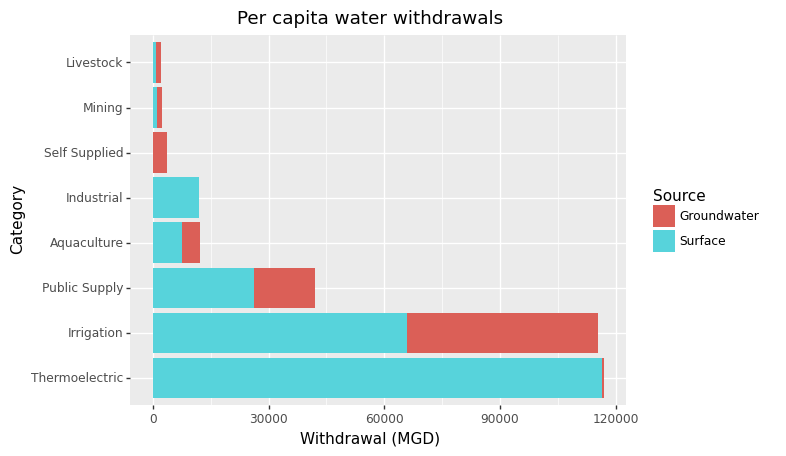

<ggplot: (-9223371961132592608)>

In [20]:
#Create facets based on the Type column
(ggplot(data=dfSubset) + 
 geom_col(aes(x='Category_sort', #Note: X field now set to the Category_sort column
              y='Withdrawal_MGD',
              fill='Source')) + 
 #facet_grid(facets='Type ~ .') + #Comment out facet command as we now only have Fresh
 ggtitle('Per capita water withdrawals') + 
 ylab("Withdrawal (MGD)") +
 xlab("Category") +              #X label added 
 coord_flip() 
)

#### Export the image

In [21]:
plot = (ggplot(data=dfSubset) + 
        geom_col(aes(x='Category_sort', #Note: X field now set to the Category_sort column
                      y='Withdrawal_MGD',
                      fill='Source')) + 
        #facet_grid(facets='Type ~ .') + #Comment out facet command as we now only have Fresh
        ggtitle('Per capita water withdrawals') + 
        ylab("Withdrawal (MGD)") +
        xlab("Category") +              #X label added 
        coord_flip() 
       )
plot.save(filename="MyPlot.png",width=10,height=3,dpi=300)

C:\Users\jpfay\AppData\Local\ESRI\conda\envs\gis\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 10 x 3 in image.
C:\Users\jpfay\AppData\Local\ESRI\conda\envs\gis\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: MyPlot.png
